# Fundamentals of Computer Science 30398 - Lecture 11

## Sudoku solver: Exercise solution

Here you can find solution to the "Sudoku Solver" exercise - this is just the Python code. See the "sudoku.ipynb" on Piazza (with the exercise description) for discussion about the algorithm, and what this code is doing. The function `available_digits` was already provided there, together with the explanation of how it was written. The description of the algorithm implemented by `sudoku_solver` was also provided there; here we include all those functions for completeness and implement the `sudoku_solver` function.

In [32]:
sudoku = [[5,6,0,9,0,0,4,2,7],
          [3,0,0,6,8,0,9,0,0],
          [0,9,0,0,0,4,0,0,0],
          [0,2,0,0,0,5,8,0,1],
          [8,0,1,0,2,0,3,0,0],
          [4,0,0,8,9,0,0,5,6],
          [7,3,0,1,0,0,0,9,0],
          [2,1,9,0,0,0,0,6,4],
          [0,8,0,4,0,0,0,3,2]]

In [2]:
sudoku_extreme = [[0,0,0,9,0,0,0,0,7],
                  [0,0,0,8,0,1,0,9,0],
                  [8,0,1,4,0,0,0,0,0],
                  [9,0,0,5,0,8,4,0,0],
                  [0,0,4,0,0,0,0,3,0],
                  [0,0,7,0,0,0,9,0,0],
                  [0,0,0,6,0,0,0,0,3],
                  [1,0,2,0,3,4,0,0,0],
                  [5,0,0,0,0,0,0,0,0]]

In [ ]:
pos = (2, 4)

In [16]:
def available_digits(partial_sudoku, pos):
    row_digits = partial_sudoku[pos[0]]
    column_digits = [ partial_sudoku[x][pos[1]] for x in range(9)]
    box_digits = get_box_digits(partial_sudoku, pos)
    return [ x for x in range(1, 10) \
                 if not is_in_any(x, [row_digits, column_digits, box_digits])]

In [11]:
def is_in_any(target, lists):
    for lst in lists:
        if target in lst:
            return True
    return False

In [12]:
def get_box_digits(partial_sudoku, pos):
    row_i = pos[0] // 3
    col_i = pos[1] // 3
    result = []
    for i in range(3):
        for j in range(3):
            x = row_i*3 + i
            y = col_i*3 + j
            result.append(partial_sudoku[x][y])
    return result

In [18]:
available_digits(partial_sudoku=sudoku, pos= (0, 4))

[1, 3]

In [23]:
def next_pos(pos):
    if pos[1] == 8:
        return (pos[0] + 1, 0)
    else:
        return (pos[0], pos[1] + 1)

In [20]:
def sudoku_solver(partial_sudoku, pos):
    if pos[0] == 9:
        return True
    if partial_sudoku[pos[0]][pos[1]] != 0:
        return sudoku_solver(partial_sudoku, next_pos(pos))

    digits = available_digits(partial_sudoku, pos)
    for d in digits:
        partial_sudoku[pos[0]][pos[1]] = d
        if sudoku_solver(partial_sudoku, next_pos(pos)):
            return True
    partial_sudoku[pos[0]][pos[1]] = 0
    return False

## One minor improvement
The `sudoku_solver` function seems to work: we pass a partially filled sudoku grid as an argument, and it returns `True`, if there is a solution to the sudoku puzzle -- in which case, it modifies the grid passed as an argument - after having called the function, the grid will contain full solution to the puzzle:

In [194]:
sudoku_solver(partial_sudoku=sudoku, pos=(0,0))

True

In [195]:
sudoku

[[5, 6, 8, 9, 1, 3, 4, 2, 7],
 [3, 4, 2, 6, 8, 7, 9, 1, 5],
 [1, 9, 7, 2, 5, 4, 6, 8, 3],
 [9, 2, 6, 3, 4, 5, 8, 7, 1],
 [8, 5, 1, 7, 2, 6, 3, 4, 9],
 [4, 7, 3, 8, 9, 1, 2, 5, 6],
 [7, 3, 4, 1, 6, 2, 5, 9, 8],
 [2, 1, 9, 5, 3, 8, 7, 6, 4],
 [6, 8, 5, 4, 7, 9, 1, 3, 2]]

Sometimes this might not be a desirable behavior. We might prefer the function to not touch the grid that was passed as an argument, but instead return a new grid with the filled sudoku, while preserving the solution to the old one. Let's reset the value of the `sudoku` global variable.

In [196]:
sudoku = [[5,6,0,9,0,0,4,2,7],
          [3,0,0,6,8,0,9,0,0],
          [0,9,0,0,0,4,0,0,0],
          [0,2,0,0,0,5,8,0,1],
          [8,0,1,0,2,0,3,0,0],
          [4,0,0,8,9,0,0,5,6],
          [7,3,0,1,0,0,0,9,0],
          [2,1,9,0,0,0,0,6,4],
          [0,8,0,4,0,0,0,3,2]]

We will try to "wrap" a function `sudoku_solver` with an additional function, that has very simple purpose: it's going to copy the `partial_sudoku` passed to it as an argument, and call sudoku_solver on this new copy - if the sudoku solver managed to find the solution, we return the copy --- now, filled in with the solution. Let's try a natural implementation of this idea.

**Warning** This implementation will turn out to be wrong.

In [219]:
def solve_sudoku_wrong(partial_sudoku): # WRONG
    copied_sudoku = partial_sudoku.copy()
    if sudoku_solver(partial_sudoku=copied_sudoku, pos=(0,0)):
        return copied_sudoku
    else:
        return None

We can try if this seems to be doing what we want it to be doing. Initially, variable `sudoku` contains a partially filled grid (with some zeros)

In [199]:
sudoku

[[5, 6, 0, 9, 0, 0, 4, 2, 7],
 [3, 0, 0, 6, 8, 0, 9, 0, 0],
 [0, 9, 0, 0, 0, 4, 0, 0, 0],
 [0, 2, 0, 0, 0, 5, 8, 0, 1],
 [8, 0, 1, 0, 2, 0, 3, 0, 0],
 [4, 0, 0, 8, 9, 0, 0, 5, 6],
 [7, 3, 0, 1, 0, 0, 0, 9, 0],
 [2, 1, 9, 0, 0, 0, 0, 6, 4],
 [0, 8, 0, 4, 0, 0, 0, 3, 2]]

We call `solve_sudoku` on this grid, and it returns a fully-filled grid, that looks good:

In [201]:
solve_sudoku(sudoku)

[[5, 6, 8, 9, 1, 3, 4, 2, 7],
 [3, 4, 2, 6, 8, 7, 9, 1, 5],
 [1, 9, 7, 2, 5, 4, 6, 8, 3],
 [9, 2, 6, 3, 4, 5, 8, 7, 1],
 [8, 5, 1, 7, 2, 6, 3, 4, 9],
 [4, 7, 3, 8, 9, 1, 2, 5, 6],
 [7, 3, 4, 1, 6, 2, 5, 9, 8],
 [2, 1, 9, 5, 3, 8, 7, 6, 4],
 [6, 8, 5, 4, 7, 9, 1, 3, 2]]

But what about the original variable `sudoku`?

In [202]:
sudoku

[[5, 6, 8, 9, 1, 3, 4, 2, 7],
 [3, 4, 2, 6, 8, 7, 9, 1, 5],
 [1, 9, 7, 2, 5, 4, 6, 8, 3],
 [9, 2, 6, 3, 4, 5, 8, 7, 1],
 [8, 5, 1, 7, 2, 6, 3, 4, 9],
 [4, 7, 3, 8, 9, 1, 2, 5, 6],
 [7, 3, 4, 1, 6, 2, 5, 9, 8],
 [2, 1, 9, 5, 3, 8, 7, 6, 4],
 [6, 8, 5, 4, 7, 9, 1, 3, 2]]

Turns out the values in this grid are also all modified. What happend? The `copy` method of a list, does essentially the following thing:

In [203]:
def copy(lst):
    result = []
    for x in lst:
        result.append(x)
    return x

I.e. it creates a new list, and appends all elements from the original list, to the new one. The `partial_sudoku` is a list of `9` elements, each if which is **referencing** ("pointing") to a list of `9` numbers. After calling `partial_sudoku.copy()` we create a new list, each element of which is, again, pointing to the same, already existing lists, having the data digits. Let's see this on a smaller example:

In [207]:
l1 = [ [1,2], [2, 3] ]
l2 = l1.copy()

In [208]:
l1

[[1, 2], [2, 3]]

In [209]:
l2

[[1, 2], [2, 3]]

The list `l1` and `l2` are at this point two different lists. But each element of a list `l1` is pointing to the same list, as a corresponding element of the list `l2`. For example, if I change the first element of `l1`, it will not affect the list l2

In [213]:
l1[0] = 0

In [214]:
l1

[0, [2, 3]]

In [215]:
l2

[[1, 2], [2, 3]]

But `l2[1]` is pointing to the exact same list as `l1[1]`. If I change an element of this list, by accessing `l1[1][0]`, this will be reflected by in `l2[1][0]` --- after all `l1[1]` and `l2[1]` is the same list:

In [216]:
l1[1][0] = 'Hello'

In [217]:
l1

[0, ['Hello', 3]]

In [218]:
l2

[[1, 2], ['Hello', 3]]

Let's try to properly copy the data in the `partial_sudoku`. Instead of copying the list `partial_sudoku`, we will iterate over this list, and copy each element of it.

In [220]:
def solve_sudoku(partial_sudoku):
    copied_sudoku = [ x.copy() for x in partial_sudoku ]
    if sudoku_solver(partial_sudoku=copied_sudoku, pos=(0,0)):
        return copied_sudoku
    else:
        return None

We can now reset the value of the `sudoku` variable, and see that it works as intended.

In [222]:
sudoku = [[5,6,0,9,0,0,4,2,7],
          [3,0,0,6,8,0,9,0,0],
          [0,9,0,0,0,4,0,0,0],
          [0,2,0,0,0,5,8,0,1],
          [8,0,1,0,2,0,3,0,0],
          [4,0,0,8,9,0,0,5,6],
          [7,3,0,1,0,0,0,9,0],
          [2,1,9,0,0,0,0,6,4],
          [0,8,0,4,0,0,0,3,2]]

In [223]:
sudoku

[[5, 6, 0, 9, 0, 0, 4, 2, 7],
 [3, 0, 0, 6, 8, 0, 9, 0, 0],
 [0, 9, 0, 0, 0, 4, 0, 0, 0],
 [0, 2, 0, 0, 0, 5, 8, 0, 1],
 [8, 0, 1, 0, 2, 0, 3, 0, 0],
 [4, 0, 0, 8, 9, 0, 0, 5, 6],
 [7, 3, 0, 1, 0, 0, 0, 9, 0],
 [2, 1, 9, 0, 0, 0, 0, 6, 4],
 [0, 8, 0, 4, 0, 0, 0, 3, 2]]

In [224]:
solve_sudoku(partial_sudoku=sudoku)

[[5, 6, 8, 9, 1, 3, 4, 2, 7],
 [3, 4, 2, 6, 8, 7, 9, 1, 5],
 [1, 9, 7, 2, 5, 4, 6, 8, 3],
 [9, 2, 6, 3, 4, 5, 8, 7, 1],
 [8, 5, 1, 7, 2, 6, 3, 4, 9],
 [4, 7, 3, 8, 9, 1, 2, 5, 6],
 [7, 3, 4, 1, 6, 2, 5, 9, 8],
 [2, 1, 9, 5, 3, 8, 7, 6, 4],
 [6, 8, 5, 4, 7, 9, 1, 3, 2]]

In [225]:
sudoku

[[5, 6, 0, 9, 0, 0, 4, 2, 7],
 [3, 0, 0, 6, 8, 0, 9, 0, 0],
 [0, 9, 0, 0, 0, 4, 0, 0, 0],
 [0, 2, 0, 0, 0, 5, 8, 0, 1],
 [8, 0, 1, 0, 2, 0, 3, 0, 0],
 [4, 0, 0, 8, 9, 0, 0, 5, 6],
 [7, 3, 0, 1, 0, 0, 0, 9, 0],
 [2, 1, 9, 0, 0, 0, 0, 6, 4],
 [0, 8, 0, 4, 0, 0, 0, 3, 2]]

Indeed, the `solve_soduku` function returns a new grid, fully solved, and doesn't affect the grid passed to it as an argument.

## Graph algorithms

We will now start learning implementation of basic graph algorithms --- many of which were covered in the theory part of this course. To this end, we will create a simple class `Graph` that we will use to store a graph. Let's start with a class definition like this:

In [226]:
class Graph:
    def __init__(self, n):
        self.n = n
        self.neighbors = [ [] for i in range(n) ]

    def add_edge(self, a, b):
        self.neighbors[a].append(b)
        self.neighbors[b].append(a)

    def __repr__(self):
        return "Graph " + repr(self.neighbors)

The objects of type `Graph` have two fields `n` --- number of vertices, and `neighbors` -- a list of lists. For a graph `G`, the field `G.neighbors[a]` will be a list containing indices of all vertices connected by an edge with `a`. The class also have three simple methods --- `__init__` as usual, for initializing the new Graphs (it takes a single argument `n` -- the number of vertices of a newly created graph), `add_edge` --- inserts an edge between `a` and `b` (edges in our graph are undirected: so the function needs to add `a` as a neighbor of vertex `b`, and adds `b` as a neighbor of vertex `a`, and `__repr__` to print nicely objects of type `Graph` in the interactive environment. Let's try to create a simple graph.

In [231]:
G = Graph(5)
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(0, 2)
G.add_edge(3, 4)
G

Graph [[1, 2], [0, 2], [1, 0], [4], [3]]

In [230]:
G.n

5

The graph consists of $5$ nodes and 4 edges: a triangle on vertices $0, 1, 2$, and an edge connecting vertices $3$ and $4$.

### Basic graph algorithm: Depth First Search (DFS)

We would like to create a new method `connected_components` in the class `Graph`, that we can use to list all connected component, that is, it should return a list of lists --- for each connected component of the graph, we should collect all of the vertices in this connected component (in no particular order). To this end, we would like to write some function, that will traverse a graph starting from a given vertex --- start at a vertex $v$, and follow some edges, in such a way that eventually all vertices reachable from $v$ will be reached.

One of the simplest to implement methods of doing this is the "DFS" algorithm - at a cost of not finding the shortest paths (as the BFS algorithm does), it has a simple recursive structure.

To implement a DFS algorithm, we need to keep track of which vertices has already been visited (in a list `visited` of Boolean variables). The DFS method takes as an input a graph, a current vertex, and a list of visited vertices. First, it marks the current vertex as visited, then it iterates over all neighbors of current vertex, and for those which were not visited yet, it calls DFS recursively.

The first implementation of a function `DFS` could look like that:

In [238]:
def DFS(graph, cur_vertex):
    graph.visited[cur_vertex] = True
    for x in graph.neighbors[cur_vertex]:
        if not graph.visited[x]:
            DFS(graph, x)

Of course, assuming that we initialize the list `graph.visited` as `[False for i in range(graph.n)]` at some point before calling `DFS`. After calling `DFS(graph, i)`, the list `graph.visited` will have value `True` for all vertices reachable from the vertex `i`.

For us, we want the `DFS` function to give us a list of all vertices it actually seen - so that we could use it to list all connected components of a graph `graph`. The following simple modification seems reasonable, but it is not the best way of doing it:

In [239]:
def DFS_slow(graph, cur_vertex):
    graph.visited[cur_vertex] = True
    result = [cur_vertex]
    for x in graph.neighbors[cur_vertex]:
        if not graph.visited[x]:
            result += DFS_slow(graph, x)
    return result

In [240]:
G.visited = [False for i in range(G.n)]
DFS_slow(G, 0)

[0, 1, 2]

It correctly returns `[0,1,2]` -- a list of vertices rachable from `0`, so what is the issue? The first implementation `DFS`, was running in time $O(n + m)$ --- it visited each vertex once, and looked at each edge twice (once in each direction). The implementation `DFS_slow` might actually take time $\Omega(n^2)$. The guilty line is `result += DFS_slow(graph, x)` - even though it looks innocuous, it copies the entire list returned by `DFS_slow`, to a new list, one element at a time. For example, if the entire graph is just a simple path, with vertex of number $i$ connected only to vertices $i-1$ and $i+1$, the `DFS_slow` in most of the vertices will have to copy a list of size around $n$ to the new list `result`.

A better way of doing it, is to pass a reference to a single list `result` as an argument, throughout the entire run of the algorithm, and just keep appending vertices to the same list.

In [243]:
def DFS(graph, cur_vertex, result):
    graph.visited[cur_vertex] = True
    result.append(cur_vertex)
    for x in graph.neighbors[cur_vertex]:
        if not graph.visited[x]:
            DFS(graph, x, result)

In [247]:
G.visited = [False for i in range(G.n)]
result = []
DFS(G, 0, result)
result

[0, 1, 2]

Still works, but now correctly implements a `DFS` algorithm running in time $O(n+m)$. Let's add this function as a method of a class `Graph`, and add a `connected_components` function around it that will be more user friendly --- iterate over all elements of the graph and call `DFS` to find all connected components of this graph.

Note that, when adding `DFS` function as a method of a class `Graph`, the recursive calls will are no longer `DFS(graph, x, result)` but instead are `self.DFS(x, result)`. The first argument, for a method, is conventionally called `self`, and it is better form to use `self.DFS(...)` syntax to call a method of this object, instead of `Graph.DFS(self, ...)`.

In [248]:
class Graph:
    def __init__(self, n):
        self.n = n
        self.neighbors = [ [] for i in range(n) ]

    def add_edge(self, a, b):
        self.neighbors[a].append(b)
        self.neighbors[b].append(a)

    def __repr__(self):
        return "Graph " + repr(self.neighbors)

    def DFS(self, cur_vertex, result):
        result.append(cur_vertex)
        self.visited[cur_vertex] = True
        for x in self.neighbors[cur_vertex]:
            if not self.visited[x]:
                self.DFS(x, result)

    def connected_components(self):
        self.visited = [ False for i in range(self.n) ]
        result = []
        for i in range(self.n):
            if not self.visited[i]:
                cc = []
                self.DFS(i, cc)
                result.append(cc)
        return result

In [250]:
G = Graph(5)
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(0, 2)
G.add_edge(3, 4)
G

Graph [[1, 2], [0, 2], [1, 0], [4], [3]]

In [251]:
G.connected_components()

[[0, 1, 2], [3, 4]]

Perfect, seems to work!

### Minimal implementation of DFS

Note that we have included here quite a bit of so-called "boilerplate code" --- a code that doesn't do much, like definition of the class `Graph`, together with initialization method, and `add_edge` method. This is often good style (as long as it is not overdone), especially when writing a larger code, it helps keeping code organized, and avoids too much of a mess. At some point our code might have to manage several different graphs, and we might have written several methods operating on the graph (for example, we might consider adding `BFS` method to get shortest paths in the graph `G`.

On the other hand, the downside is that the code we write is quite a bit longer than in needs to be just to implement the DFS algorithm itself. Let us try to write a more streamlined implementation of the DFS algorithm, to see that it is short and simple.

**Exercise**
Write a function `is_reachable(n, edges, source, target)` that gets as arguments:
1. Integer `n` --- number of vertices of the graph.
2. List `edges` -- containing edges of the graph -- each edge is given as a pair of indices vertices laying on it.
3. Integers `source` and `target` --- indices of source and target vertex

The function should return `True` if there is a path from `source` to `target` in a graph with edges `edges` (and `False` otherwise).

**Hint**
You will likely want to implement two functions: a recursive function `DFS` that runs a DFS algorithm over a graph, and the main function `is_reachable` that prepares all data for `DFS` --- for example translates the list `edges` into list of lists for neighbors of each vertex, and prepares a `visited` list.

**Solution.**

In [252]:
def is_reachable(n, edges, source, target):
    # Prepare a list neighbors. neighbors[i] should be a list of all neighbors of a vertex `i`
    neighbors = [ [] for i in range(n)]
    for u,v in edges:
        neighbors[u].append(v)
        neighbors[v].append(u)
    # Prepare a list `visited` for the DFS algorithm. Initially no vertex is visited.
    visited = [False for i in range(n)]
    # run DFS from the source vertex. At the end `target` is visited if and only if it is in the same connected component.
    DFS(source, neighbors, visited)
    return visited[target]

The recursive implementation of the DFS algorithm in this scenario is very simple: similar to what we had before, but we do not even need to collect all visited vertices in a list: all we care about is the content of the list `visited` after running DFS from a vertex `source`.

In [253]:
def DFS(cur_vertex, neighbors, visited):
    visited[cur_vertex] = True
    for w in neighbors[cur_vertex]:
        if not visited[w]:
            DFS(w)

## Connected components of a random graph

With the implementation of the class `Graph` together with a method `connected_components` we can try to run a few interesting experiments. We will create a random graph of $n$ vertices with edge density $p$ (this is so-called _Erdős–Rényi graph_ $G(n, p)$) --- each of the possible $\binom{n}{2}$ edges is included independently in a graph $G$. For a graph constructed like this, we will collect some statistics on connectivity: how many connected components it has? How large is the largest connected component? We will use `matplotlib.pyplot` library to plot those statistics with various choices of the edge density `p`.

To generate random edges of the graph we will use library `random`, as usual.

In [70]:
import random

In order to get a boolean variable that is `True` with probability exactly `p`, (for $p \in [0, 1]$), we will just draw a uniformly random number in range $(0, 1)$ using `random.uniform(0, 1)` and check if it is smaller than `p`: this happens with probability exactly `p`. For example:

In [255]:
p = 0.3

In [256]:
random.uniform(0, 1) < p

False

**Exercise** 
Create a random graph on $N$ vertices, each edge appearing with probability $p$.

In [145]:
def random_graph(n, p):
    G = Graph(n)
    for i in range(n):
        for j in range(i+1, n):
            if random.uniform(0, 1) < p:
                G.add_edge(i, j)
    return G

In [148]:
p = 0.3
N = 300

In [149]:
G = random_graph(N, p)

In [147]:
len(G.connected_components())

1

**Exercise** 
Write a function `equally_spaced(start, stop, n=30)` that returns a list of `n` equally spaced numbers, from `start` to `stop` (inclusive). This will be useful to prepare a list of edge desities `list_of_p` -- for each, we will create an Erdős–Rényi graph with this edge density, and determine its connected components.

In [150]:
def equally_spaced(start, stop, n=30):
    dist = (stop - start) / (n - 1)
    return [ start + dist * j for j in range(n)]

**Exercise**
For each $p$ in `list_of_prob`, generate an Erdős–Rényi random graph with edgre probability $p$, and calculate the size of the largest connected component in such a graph. Return a list of those sizes.

**Solution 1**
A slick, Python-y way of doing this (heavily realying on the list comprehension syntax):

In [271]:
def largest_connected_component(graph):
    return max([len(cc) for cc in graph.connected_components()])

In [272]:
def max_ccs(list_of_prob):
    return [ largest_connected_component(random_graph(N, p)) for p in list_of_prob]

**Solution 2**
A more long-winded code, writing all the loops explicitly.

In [273]:
def largest_connected_component(graph):
    connected_components = graph.connected_components()
    result = 0
    for cc in connected_components:
        if len(cc) > result:
            result = len(cc)
    return result

In [274]:
def max_ccs(list_of_prob):
    result = []
    for p in list_of_prob:
        result.append(largest_connected_component(random_graph(N, p)))
    return result

In this case Solution 1 is preferable - but it's better to keep a complexity of what's happening within a single line of code under control. When Python-y one-liners become too dense, keep in mind that you can just explicitly expand all the loops.

### Plotting the size of largest connected component

We will now produce a list of equally spaced numbers between $0$ and $5/N$ use the `max_ccs` function $10$ times, to produce random graphs with each of the $p$ from the list, and calculate the size of the largest connected component. We will plot the results of all those experiments on a single graph.

In [283]:
import matplotlib.pyplot as plt

In [285]:
?plt.vlines

Signature:
plt.vlines(
    x: 'float | ArrayLike',
    ymin: 'float | ArrayLike',
    ymax: 'float | ArrayLike',
    colors: 'ColorType | Sequence[ColorType] | None' = None,
    linestyles: 'LineStyleType' = 'solid',
    *,
    label: 'str' = '',
    data=None,
    **kwargs,
) -> 'LineCollection'
Docstring:
Plot vertical lines at each *x* from *ymin* to *ymax*.

Parameters
----------
x : float or array-like
    x-indexes where to plot the lines.

ymin, ymax : float or array-like
    Respective beginning and end of each line. If scalars are
    provided, all lines will have the same length.

colors : :mpltype:`color` or list of color, default: :rc:`lines.color`

linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, default: 'solid'

label : str, default: ''

Returns
-------
`~matplotlib.collections.LineCollection`

Other Parameters
----------------
data : indexable object, optional
    If given, the following parameters also accept a string ``s``, which is
    interpreted as ``data[s]`

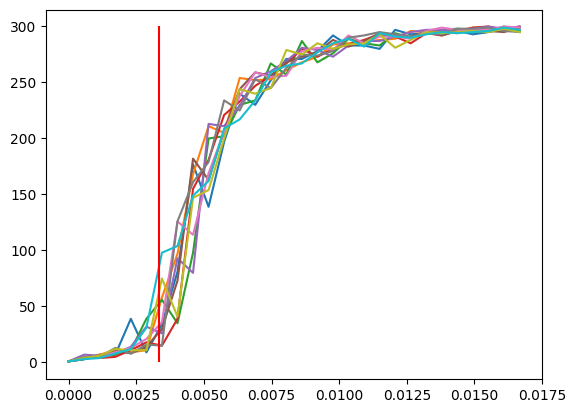

In [289]:
N = 300
list_of_p = equally_spaced(0,  5 / N, 30)
for _ in range(10):
    xx = list_of_p
    yy = max_ccs(list_of_p)
    plt.plot(xx, yy)
plt.vlines( 1/N, ymin=0, ymax=N, color="red" ) # add a vertical line indicating $p=1/N$

We can try the same with larger $N$:

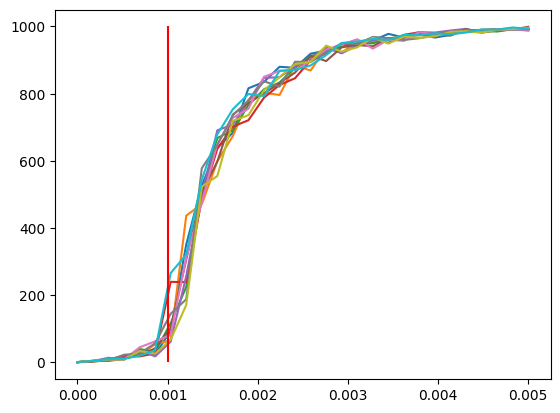

In [290]:
N = 1000
list_of_p = equally_spaced(0,  5 / N, 30)
for _ in range(10):
    xx = list_of_p
    yy = max_ccs(list_of_p)
    plt.plot(xx, yy)
plt.vlines( 1/N, ymin=0, ymax=N, color="red" ) # add a vertical line indicating $p=1/N$

Observe a phase transition phenomenon: when $p < 1/N$ (i.e. the average degree of a vertex is smaller than $1$) the largest connectected component is very small, but quickly when $p > 1/N$ the largest connected compoment contain almost all vertices. Here, already when $p=3/N$ (i.e. the average degree of a vertex is $4$), we have:

In [300]:
N = 1000
largest_connected_component(random_graph(N, 3/N))

931

That is $931$ out of the $1000$ vertices happend to be in a single connected component. Let's list a size of all connected components in such a graph:

In [297]:
sorted([len(cc) for cc in random_graph(N, 3/N).connected_components()])

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 945]

Turns out that the random graph has almost all vertices in a single connected component, and then several very small connected component: mostly isolated vertices, some comopnents of size $2$, very few of size $3$. If we repeat this experiment with freshly drawn random graph, qualitiative behavior will be similar:

In [298]:
sorted([len(cc) for cc in random_graph(N, 3/N).connected_components()])

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 951]

# Weighted graphs and minimum spanning tree

We will start writing a class for representing weighted graphs, and provide a pseudocode for the Kruskal's algorithm for minimum spanning tree (it was discussed previously in class).

As a reminder, the Kruskal algorithm works as follows:
1. Initially the tree we are producing is empty, and each vertex is in its own connected component (has its own _color_)
2. We sort all edges of a graph in an increasing order.
3. We iterate over the edges of a graph in an increasing order.
   1. If the two end-points of the edge $e$ have the same color (are already in the same connected component), we skip the edge.
   2. If the two end-points $a, b$ have different colors (are not yet connected by the set of edges selected to the MST), we add this edge to the MST, and merge the two connected components; we will implement it by changing the color of all vertices with color which is the same as `color[a]` to `color[b]`.
4. At the end, we return the set of edges added to a graph.

A naive implementation of this algorithm will result in $\Theta(n^2 + m \log m)$ running time: $\Theta(m \log m)$ time for sorting all edges, $\Theta(n^2)$, since we perform re-coloring $n-1$ times (every time a new edge is added to a tree), and in each of those steps we spend $\Theta(n)$ time to iterate over all vertices and recolor relevant ones.

**Exercise**
Implement this algorithm below, filling in actual code in place of the comments. You might want to add another method `recolor` to the class `WeightedGraph`.

In [193]:
class WeightedGraph:
    def __init__(self, n):
        self.n = n
        self.neighbors = [ [] for i in range(n) ]
        self.edges = []
        
    def add_edge(self,i, j, w):
        self.edges.append( (i,j, w) )
        self.neighbors[i].append( (j, w))
        self.neighbors[j].append( (i, w) )

    def MST(self):
        sorted_edges = sorted(self.edges, key = lambda x : x[2])
        self.color = [i for i in range(n)]
        for e in sorted_edges:
            a, b, w = e
            # check if color of a is the same as color of b
            # if there are the same - nothing to be done
            # otherwise: add e to MST, recolor all vertices with the same color as a
        # return list of edges on the MST

In [189]:
G = WeightedGraph(5)
G.add_edge(0, 1, 1)
G.add_edge(0, 2, 1)
G.add_edge(1, 2, 5)
G.add_edge(2, 3, 2)
G.add_edge(3, 4, 10)
G.add_edge(2, 4, 3)